In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [7]:
filename = 'MovieReviewsMPJ.csv'

rawdata = pd.read_csv(filename)

In [8]:
vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(rawdata.text.tolist())

In [9]:
transformed_documents

<11111x42982 sparse matrix of type '<class 'numpy.float64'>'
	with 1021916 stored elements in Compressed Sparse Row format>

In [11]:
transformed_documents_as_array = transformed_documents.toarray()

In [13]:
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

    # output to a csv using the enumerated value for the filename
#     one_doc_as_df.to_csv(output_filenames[counter])

In [14]:
one_doc_as_df

,term,score
0,bootleg,15.353447
1,heyricky,9.622634
2,dickinson,8.706343
3,april,7.425409
4,angie,7.019944
...,...,...
42977,fabrications,0.000000
42978,fabrities,0.000000
42979,fabulous,0.000000
42980,fabulously,0.000000


In [15]:
tf_idf_tuples

[('00', 0.0),
 ('000', 0.0),
 ('0007169922', 0.0),
 ('000lbs', 0.0),
 ('001', 0.0),
 ('002', 0.0),
 ('003', 0.0),
 ('003dec4', 0.0),
 ('004', 0.0),
 ('00440', 0.0),
 ('005', 0.0),
 ('006', 0.0),
 ('0061438596', 0.0),
 ('007', 0.0),
 ('008', 0.0),
 ('009', 0.0),
 ('0099496941', 0.0),
 ('00am', 0.0),
 ('01', 0.0),
 ('010', 0.0),
 ('011', 0.0),
 ('012', 0.0),
 ('013', 0.0),
 ('014', 0.0),
 ('0140449264', 0.0),
 ('015', 0.0),
 ('0152058222', 0.0),
 ('016', 0.0),
 ('017', 0.0),
 ('018', 0.0),
 ('019', 0.0),
 ('01frightworld', 0.0),
 ('02', 0.0),
 ('020', 0.0),
 ('021', 0.0),
 ('022', 0.0),
 ('023', 0.0),
 ('024', 0.0),
 ('025', 0.0),
 ('026', 0.0),
 ('027', 0.0),
 ('028', 0.0),
 ('029', 0.0),
 ('03', 0.0),
 ('030', 0.0),
 ('031', 0.0),
 ('0316769177', 0.0),
 ('032', 0.0),
 ('033', 0.0),
 ('034', 0.0),
 ('0345423879', 0.0),
 ('0345461517', 0.0),
 ('035', 0.0),
 ('036', 0.0),
 ('037', 0.0),
 ('0375726349', 0.0),
 ('038', 0.0),
 ('039', 0.0),
 ('03s', 0.0),
 ('04', 0.0),
 ('040', 0.0),
 ('041'

In [69]:
import pandas as pd
from collections import Counter

from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
 
stop_words = set(stopwords.words('english')) 
# nltk.download()

In [70]:
def tokenize(text, remove_stopwords=True):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    if remove_stopwords:
        stems = [stem for stem in stems if stem not in stop_words]
    return stems

In [7]:
filename = 'MovieReviewsMPJ.csv'

rawdata = pd.read_csv(filename)

# train = 0.6
# valid = 0.2
# test = 0.2

In [36]:
rawdata

,productid,userId,profileName,summary,text,SAS_datetime,score,timeInfo,dontcare,helpfulness,Unnamed: 10,Unnamed: 11
0,B003AI2VGA,A141HP4LYPWMSR,"Brian E. Erland ""Rainbow Sphinx""",There Is So Much Darkness Now ~ Come For The M...,"Synopsis: On the daily trek from Juarez, Mexic...",6/24/07 0:00,3,1182729600,NaN,7-Jul,7.0,7.0
1,B003AI2VGA,A328S9RN3U5M68,Grady Harp,Worthwhile and Important Story Hampered by Poo...,THE VIRGIN OF JUAREZ is based on true events s...,6/15/07 0:00,3,1181952000,NaN,4-Apr,4.0,4.0
2,B003AI2VGA,A1I7QGUDP043DG,"Chrissy K. McVay ""Writer""",This movie needed to be made.,The scenes in this film can be very disquietin...,11/29/06 0:00,5,1164844800,NaN,10-Aug,10.0,8.0
3,B003AI2VGA,A1M5405JH9THP9,golgotha.gov,distantly based on a real tragedy,THE VIRGIN OF JUAREZ (2006)<br />directed by K...,12/8/07 0:00,3,1197158400,NaN,1-Jan,1.0,1.0
4,B003AI2VGA,ATXL536YX71TR,"KerrLines ""&#34;Movies,Music,Theatre&#34;""",What's going on down in Juarez and shining a l...,"Informationally, this SHOWTIME original is ess...",8/28/07 0:00,3,1188345600,NaN,1-Jan,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11106,B0012Q3SYG,A11H0DJZ82MSS1,Bruce M. Bohner,"One great interview and another, not so much. ...",Tom Snyder's replay of an interview and salute...,12/9/09 0:00,4,1260316800,NaN,1-Jan,NaN,NaN
11107,B0012Q3SYG,A344A4O44YQMU0,Tuneman,Highly recommended for Beatles fans,This is an especially poignant interview with ...,5/27/08 0:00,5,1211846400,NaN,7-May,NaN,NaN
11108,B0012Q3SYG,AJT2SE7T0UD4G,D. Cayer,Excellent!,Tom Snyder was always entertaining and a fine ...,9/15/08 0:00,5,1221436800,NaN,3-Feb,NaN,NaN
11109,B0012Q3SYG,A1RP6YCOS5VJ5I,"GameraRocks ""captpicardfan""",Almost Perfect,This would have been a perfect Bealtes DVD if ...,6/26/09 0:00,4,1245974400,NaN,0/8,NaN,NaN


In [52]:
tokens = [dict(Counter(tokenize(text))) for text in rawdata.text]

In [71]:
pos_tokens = [dict(Counter(pos_tag(tokenize(text)))) for text in rawdata.text]

In [ ]:
ps_frame = pd.DataFrame(pos_tokens)

In [ ]:
num_docs = ps_frame.notnull().sum()

In [53]:
tokenframe = pd.DataFrame(tokens)

In [54]:
tokenframe.head()

,synopsi,:,On,the,daili,trek,from,juarez,",",mexico,...,11/81,2-,naivett,groupies.,hearfelt,cavett,interviewer.a,bealt,tapes.,heyricki
0,1.0,2.0,1.0,26.0,1.0,1.0,2.0,3.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,40.0,NaN,NaN,1.0,7.0,20.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,8.0,NaN,NaN,NaN,2.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,32.0,NaN,NaN,4.0,9.0,13.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,9.0,NaN,NaN,1.0,2.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
tokenframe.shape

(11111, 42544)

In [62]:
ps_frame.shape

(11111, 74258)

In [63]:
ps_frame.head()

,"(synopsi, NN)","(:, :)","(On, IN)","(the, DT)","(daili, NN)","(trek, NN)","(from, IN)","(juarez, NN)","(,, ,)","(mexico, NN)",...,"(hearfelt, NN)","(snyder, VB)","(hawk, VBZ)","(cavett, NN)","(interviewer.a, NN)","(bealt, NN)","(ringo, VBZ)","(angi, DT)","(tapes., NN)","(heyricki, NN)"
0,1.0,2.0,1.0,26.0,1.0,1.0,2.0,3.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,40.0,NaN,NaN,1.0,6.0,20.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,8.0,NaN,NaN,NaN,2.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,32.0,NaN,NaN,4.0,9.0,13.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,9.0,NaN,NaN,1.0,2.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# num_docs = 


In [24]:
res = ne_chunk(pos_tag(word_tokenize(text_0)))

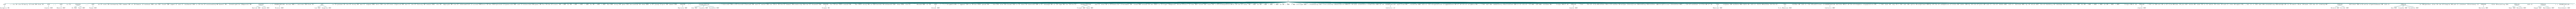

In [25]:
res

In [27]:
type(res)

nltk.tree.Tree

In [28]:
res.draw()

KeyboardInterrupt: 

In [18]:
nltk.ne_chunk("text_0", binary=True)

IndexError: string index out of range